In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from sklearn.preprocessing import MinMaxScaler

/kaggle/input/book-recommendation-dataset/Ratings.csv
/kaggle/input/book-recommendation-dataset/Users.csv
/kaggle/input/book-recommendation-dataset/Books.csv


In [2]:
#read all the input files
books = pd.read_csv("../input/book-recommendation-dataset/Books.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
users = pd.read_csv("../input/book-recommendation-dataset/Users.csv")
ratings = pd.read_csv("../input/book-recommendation-dataset/Ratings.csv")

In [4]:
#Selecting only useful information ( removing image URLs)
books = books.iloc[:,:5]

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
#Groupby to see which user has rated how many books
user_rating_count = ratings.groupby('User-ID').count().sort_values(by = 'ISBN', ascending = False)

In [9]:
user_rating_count.shape

(105283, 2)

In [10]:
#keep only those users who have given ratings to more than 100 books)
user_rating_count = user_rating_count[user_rating_count['ISBN']>300]

In [11]:
user_rating_count.shape

(559, 2)

In [12]:
#Get counts of the ratings for each book
book_rating_count = ratings.groupby('ISBN').count().sort_values(by = 'Book-Rating', ascending = False)

In [13]:
book_rating_count.head(10)

,User-ID,Book-Rating
ISBN,,
0971880107,2502,2502
0316666343,1295,1295
0385504209,883,883
0060928336,732,732
0312195516,723,723
044023722X,647,647
0679781587,639,639
0142001740,615,615
067976402X,614,614


In [14]:
#only keep books with more than 50 ratings
book_rating_count = book_rating_count[book_rating_count['User-ID'] > 300]

In [15]:
ratings = ratings.merge(books, on = 'ISBN')

In [16]:
ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [17]:
ratings.shape

(1031136, 7)

In [18]:
ratings = ratings[ratings['User-ID'].isin(user_rating_count.index)]

In [19]:
ratings = ratings[ratings['ISBN'].isin(book_rating_count.index)]

In [20]:
ratings.head(10)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
1994,254,043935806X,0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
1997,6251,043935806X,9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
2000,6575,043935806X,0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
2004,11676,043935806X,0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
2011,21014,043935806X,0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
2017,25409,043935806X,10,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
2019,25981,043935806X,0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
2026,30711,043935806X,8,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
2029,31826,043935806X,0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
2033,35859,043935806X,0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic


In [21]:
piv_table = ratings.pivot_table(columns = "User-ID", index = "ISBN", values = "Book-Rating")

In [22]:
piv_table.shape

(81, 539)

So we have 2101 books and 1792 users.


In [23]:
piv_table.iloc[:100, :100]

User-ID,254,2276,3363,4385,6251,6543,6575,7158,7346,8681,...,52199,52203,52584,52614,52853,52917,53174,54218,55187,55490
ISBN,,,,,,,,,,,,,,,,,,,,,
0060502258,NaN,NaN,0.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
0060928336,NaN,NaN,0.0,NaN,NaN,NaN,8.0,NaN,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,4.0,0.0,NaN,NaN,NaN
0060930535,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0060934417,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0060938455,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0743418174,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0786868716,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0804106304,0.0,NaN,NaN,NaN,0.0,NaN,9.0,NaN,9.0,NaN,...,0.0,NaN,7.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN


As you can see it is a very sparse table with most values as NaN. We will replace Nan to 0 to logically define that if  user A has given a rating of 0 we will not recommend that to similar users. This is true if user A has not read the book as well.

In [24]:
piv_table = piv_table.fillna(0)

In [25]:
pd.DataFrame(piv_table).isnull().sum().sum()

0

In [26]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(piv_table)

NearestNeighbors(algorithm='brute')

Let's list a few books at random and see which one wwe know. 

In [27]:
ratings.sample(frac = 0.001)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
44508,37712,0060934417,10,Bel Canto: A Novel,Ann Patchett,2002,Perennial
39899,209516,0060976845,9,Little Altars Everywhere: A Novel,Rebecca Wells,1996,Perennial
25027,91832,0440225701,0,The Street Lawyer,JOHN GRISHAM,1999,Dell
114889,102702,0446606812,8,Message in a Bottle,Nicholas Sparks,1999,Warner Vision
15259,40889,0440220602,8,The Chamber,John Grisham,1995,Dell Publishing Company
95831,140000,0375725784,8,A Heartbreaking Work of Staggering Genius,Dave Eggers,2001,Vintage Books USA
47158,170184,0316096199,7,Lucky : A Memoir,Alice Sebold,2002,Back Bay Books
65754,110973,0671027360,7,Angels &amp; Demons,Dan Brown,2001,Pocket Star
40296,35857,0156027321,0,Life of Pi,Yann Martel,2003,Harvest Books


I had to sample multiple times to get a book that I have read. 'The Fellowship of the Ring' with ISBN 0618002227 at index 196979

In [28]:
piv_table[piv_table.index == '0618002227']

User-ID,254,2276,3363,4385,6251,6543,6575,7158,7346,8681,...,270713,271284,273979,274004,274061,274301,274308,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,


In [29]:
test_book = piv_table[piv_table.index == '0618002227'].values

In [30]:
test_book

array([], shape=(0, 539), dtype=float64)

From the doc we are getting distances and the 

In [31]:
books = pd.read_csv("../input/book-recommendation-dataset/Books.csv")
users = pd.read_csv("../input/book-recommendation-dataset/Users.csv")
ratings = pd.read_csv("../input/book-recommendation-dataset/Ratings.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [32]:
new_df=books.merge(ratings,on='ISBN')
new_df.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0
8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,116866,9
9,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,123629,9


In [33]:
new_df.shape

(1031136, 10)

In [34]:
df_with_num_ratings=new_df.groupby(['Book-Title']).count().reset_index()[['Book-Title','Book-Rating']].rename(columns={'Book-Rating':'Num_of_ratings'})
df_with_num_ratings.head(10)

,Book-Title,Num_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
5,Clifford Visita El Hospital (Clifford El Gran...,1
6,Dark Justice,1
7,Deceived,2
8,Earth Prayers From around the World: 365 Pray...,10
9,Final Fantasy Anthology: Official Strategy Gu...,4


In [35]:
df_with_num_ratings.shape

(241071, 2)

In [36]:
df_with_avg_ratings=new_df.groupby(['Book-Title']).mean().reset_index()[['Book-Title','Book-Rating']].rename(columns={'Book-Rating':'avg_ratings'})
df_with_avg_ratings.head(10)

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00
5,Clifford Visita El Hospital (Clifford El Gran...,0.00
6,Dark Justice,10.00
7,Deceived,0.00
8,Earth Prayers From around the World: 365 Pray...,5.00
9,Final Fantasy Anthology: Official Strategy Gu...,5.00


In [37]:
df_with_avg_ratings.shape

(241071, 2)

In [38]:
books_sorted=df_with_num_ratings.merge(df_with_avg_ratings,on='Book-Title').sort_values(by=['Num_of_ratings'],ascending=False)
books_sorted.head(10)

,Book-Title,Num_of_ratings,avg_ratings
234951,Wild Animus,2502,1.019584
196326,The Lovely Bones: A Novel,1295,4.468726
183573,The Da Vinci Code,898,4.642539
5303,A Painted House,838,3.231504
199237,The Nanny Diaries: A Novel,828,3.530193
27922,Bridget Jones's Diary,815,3.527607
206502,The Secret Life of Bees,774,4.447028
52983,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740,3.437838
204387,The Red Tent (Bestselling Backlist),723,4.334716
14392,Angels &amp; Demons,670,3.708955


In [39]:
popular_books=books_sorted[books_sorted['Num_of_ratings']>300].sort_values(by=['avg_ratings'],ascending=False).head(100)
popular_books.head(10)

,Book-Title,Num_of_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
219741,To Kill a Mockingbird,510,4.700000
183573,The Da Vinci Code,898,4.642539
187880,The Five People You Meet in Heaven,430,4.551163
180556,The Catcher in the Rye,449,4.545657


In [40]:
popular_books.shape

(100, 3)

In [41]:
popular_books=popular_books.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Num_of_ratings','avg_ratings']]


In [42]:
popular_books.head(10)

,Book-Title,Num_of_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
5,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
9,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
12,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
21,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
23,To Kill a Mockingbird,510,4.700000
31,The Da Vinci Code,898,4.642539
37,The Five People You Meet in Heaven,430,4.551163
39,The Catcher in the Rye,449,4.545657


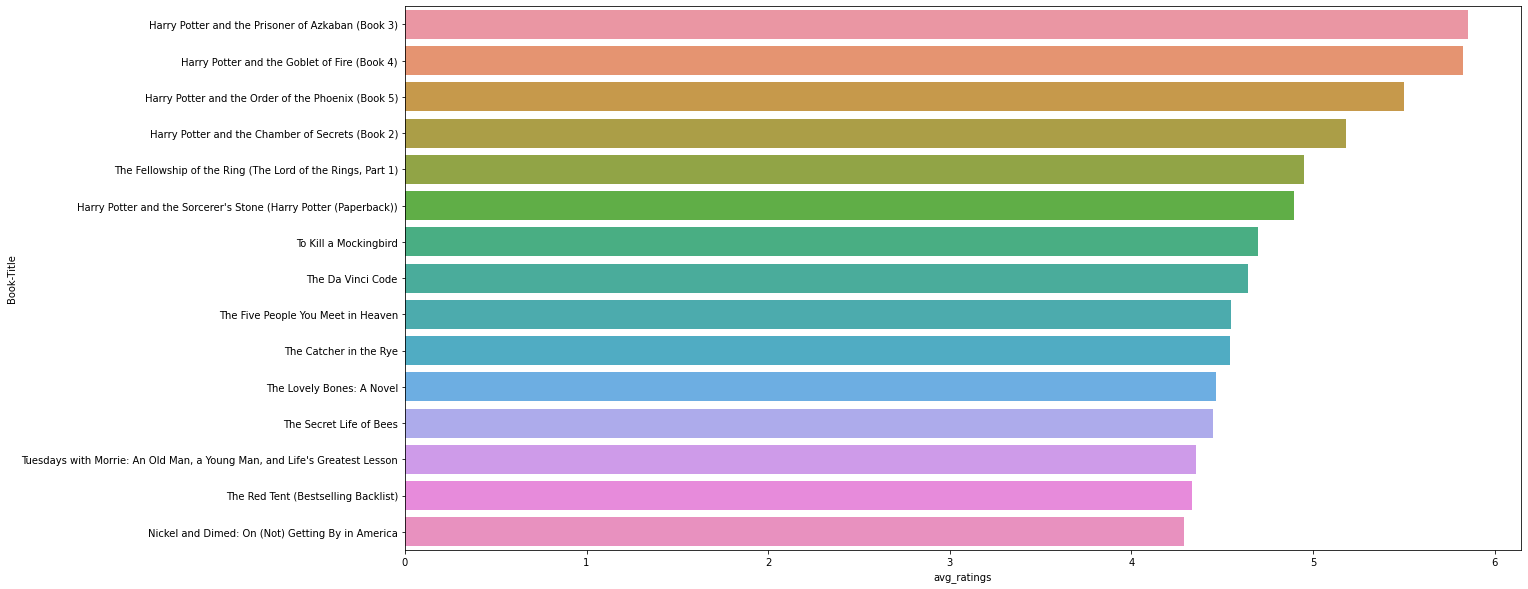

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(x=popular_books['avg_ratings'].head(15),y=popular_books['Book-Title'].head(15));

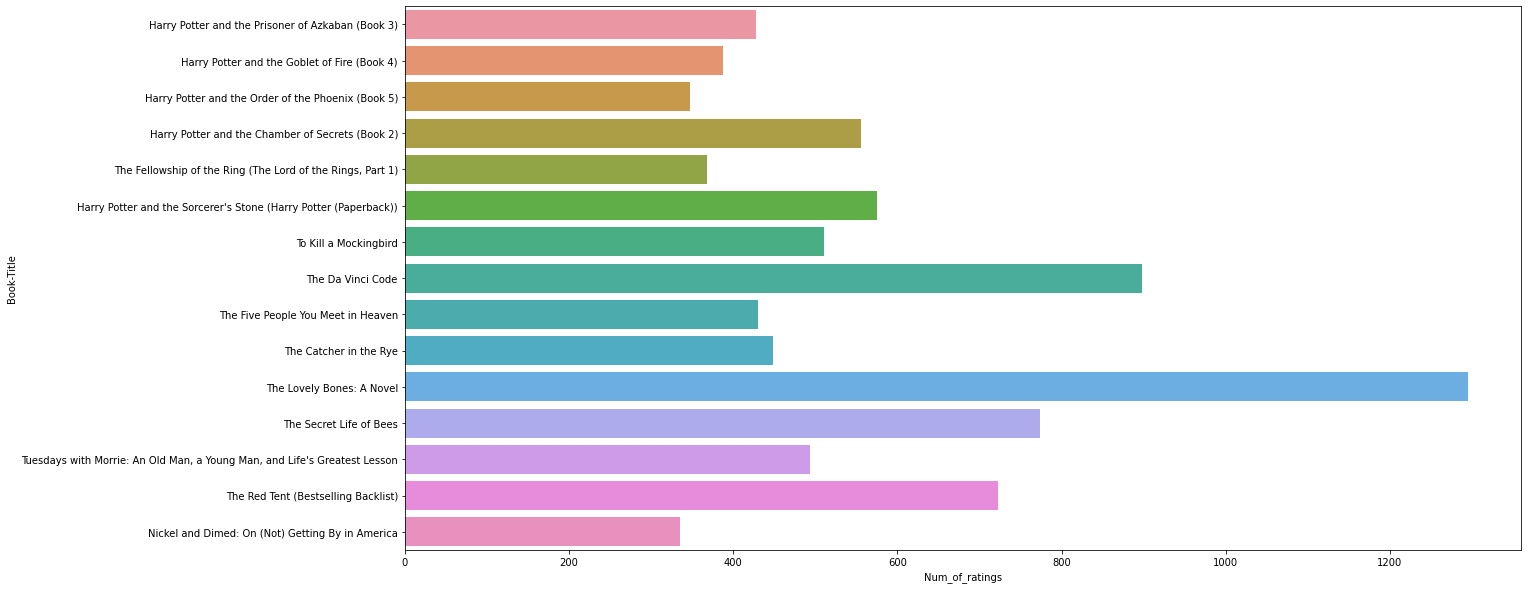

In [44]:
plt.figure(figsize=(20,10))
sns.barplot(x=popular_books['Num_of_ratings'].head(15),y=popular_books['Book-Title'].head(15));

In [45]:
books = pd.read_csv("../input/book-recommendation-dataset/Books.csv")
users = pd.read_csv("../input/book-recommendation-dataset/Users.csv")
ratings = pd.read_csv("../input/book-recommendation-dataset/Ratings.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
df=books.merge(ratings,how="left", on="ISBN")
df_=df.merge(users,how="left", on="User-ID")

df=df_.copy()
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0,"sudbury, ontario, canada",NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032345 entries, 0 to 1032344
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1032345 non-null  object 
 1   Book-Title           1032345 non-null  object 
 2   Book-Author          1032344 non-null  object 
 3   Year-Of-Publication  1032345 non-null  object 
 4   Publisher            1032343 non-null  object 
 5   Image-URL-S          1032345 non-null  object 
 6   Image-URL-M          1032345 non-null  object 
 7   Image-URL-L          1032341 non-null  object 
 8   User-ID              1031136 non-null  float64
 9   Book-Rating          1031136 non-null  float64
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(3), object(9)
memory usage: 102.4+ MB


In [48]:
df.dropna(inplace=True)
df['Book-Rating'].fillna(0, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753296 entries, 0 to 1032344
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 753296 non-null  object 
 1   Book-Title           753296 non-null  object 
 2   Book-Author          753296 non-null  object 
 3   Year-Of-Publication  753296 non-null  object 
 4   Publisher            753296 non-null  object 
 5   Image-URL-S          753296 non-null  object 
 6   Image-URL-M          753296 non-null  object 
 7   Image-URL-L          753296 non-null  object 
 8   User-ID              753296 non-null  float64
 9   Book-Rating          753296 non-null  float64
 10  Location             753296 non-null  object 
 11  Age                  753296 non-null  float64
dtypes: float64(3), object(9)
memory usage: 74.7+ MB


In [50]:
df['User-ID'] = df['User-ID'].astype('int')
df['Age'] = df['Age'].astype('int')
df["Book-Author"]=df["Book-Author"].astype("string")

In [51]:
df.drop(columns=["Image-URL-S","Image-URL-M", "Image-URL-L"],inplace=True)

In [52]:
book_amount = pd.DataFrame(df["Book-Title"].value_counts())
book_rare = book_amount[book_amount["Book-Title"] <= 100].index
book_common = df[~df["Book-Title"].isin(book_rare)]

In [53]:
user_book = book_common.pivot_table(index=["User-ID"], columns=["Book-Title"], values="Book-Rating").fillna(0)

In [54]:
user_book.head()

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Fine Balance,A Heartbreaking Work of Staggering Genius,...,Wild Animus,Winter Moon,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
book_similarity_df = user_book.corr(method='pearson')
book_similarity_df.head()

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Fine Balance,A Heartbreaking Work of Staggering Genius,...,Wild Animus,Winter Moon,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,1.000000,0.015124,-0.005282,-0.002933,0.003248,0.032600,0.013791,0.015890,0.006777,0.023632,...,0.005542,-0.002649,0.006663,0.008706,-0.003516,0.039469,0.000613,0.026430,0.036478,0.006687
1st to Die: A Novel,0.015124,1.000000,0.153185,-0.003248,0.035248,0.017095,0.030503,0.033023,0.010784,0.022639,...,-0.004399,-0.002933,0.045677,0.028029,0.033099,0.010953,0.017185,0.008515,0.005887,0.037389
2nd Chance,-0.005282,0.153185,1.000000,-0.002608,0.027283,0.023382,-0.004325,0.012407,-0.002678,-0.004434,...,0.008911,-0.002355,0.022328,0.045365,-0.003126,0.036878,-0.003358,-0.003621,-0.000454,0.029790
4 Blondes,-0.002933,-0.003248,-0.002608,1.000000,-0.002591,-0.001942,-0.002402,-0.001449,-0.001487,0.034648,...,-0.001909,-0.001308,-0.001639,-0.001906,-0.001736,0.002468,-0.001865,0.012006,0.013471,-0.002033
A Bend in the Road,0.003248,0.035248,0.027283,-0.002591,1.000000,0.006645,0.016328,-0.002593,0.005516,0.004471,...,0.010826,-0.002340,0.025993,0.018460,-0.003106,0.004958,-0.003336,-0.003598,-0.003431,0.015402


In [56]:
def get_similar_book(book_name, user_ratings):
  similar_score = book_similarity_df[book_name] * (user_ratings - 5)
  similar_score = similar_score.sort_values(ascending=False)

  return similar_score

In [57]:
book_lover = [
    ('Harry Potter and the Chamber of Secrets (Book 2)', 9)
]

similar_books = pd.DataFrame()

for book, ratings in book_lover:
  similar_books = similar_books.append(get_similar_book(book, ratings))

similar_books.head()
recommendation_book = similar_books.sum().sort_values(ascending=False).head(10)

In [58]:
recommendation_book

Harry Potter and the Chamber of Secrets (Book 2)                    4.000000
Harry Potter and the Prisoner of Azkaban (Book 3)                   2.330801
Harry Potter and the Goblet of Fire (Book 4)                        2.233924
Harry Potter and the Sorcerer's Stone (Book 1)                      1.633320
Harry Potter and the Order of the Phoenix (Book 5)                  1.299715
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))    1.253703
The Fellowship of the Ring (The Lord of the Rings, Part 1)          0.564867
The Bad Beginning (A Series of Unfortunate Events, Book 1)          0.355331
The Return of the King (The Lord of the Rings, Part 3)              0.354903
The Silmarillion                                                    0.352784
dtype: float64

In [59]:
df_new = df[["Book-Title","Book-Author"]]
df_new = df_new[df_new["Book-Title"].isin(recommendation_book)]
df_new = df_new.drop_duplicates(keep="first").reset_index(drop=True)

In [60]:
df_new.head(10)

,Book-Title,Book-Author
